In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('AMZN_Historical_Price_& news_Data.csv')

In [ ]:
df

Date        Open    High     Low   Close  Adj Close    Volume  \
0     02/01/2020   93.750000   94.90   93.21   94.90      94.90  80580000   
1     03/01/2020   93.225000   94.31   93.23   93.75      93.75  75288000   
2     06/01/2020   93.000000   95.18   93.00   95.14      95.14  81236000   
3     07/01/2020   95.225000   95.69   94.60   95.34      95.34  80898000   
4     08/01/2020   94.902000   95.55   94.32   94.60      94.60  70160000   
...          ...         ...     ...     ...     ...        ...       ...   
1274  07/02/2025  232.500000  234.81  228.06  229.15     229.15  77539300   
1275  10/02/2025  230.550003  233.92  229.20  233.14     233.14  35419900   
1276  11/02/2025  231.919998  233.44  230.13  232.76     232.76  23713700   
1277  12/02/2025  230.460007  231.18  228.16  228.93     228.93  32285200   
1278  13/02/2025  228.850006  230.42  227.52  230.37     230.37  31346500   

       EPS  P/E Ratio   Beta  ...  \
0     2.13  76.344288  1.192  ...   
1     2.13  76.344288  1.192  ...   
2     2.13  76.344288  1.192  ...   
3     2.13  76.344288  1.192  ...   
4     2.13  76.344288  1.192  ...   
...    ...        ...    ...  ...   
1274  5.66  38.780574  1.192  ...   
1275  5.66  38.780574  1.192  ...   
1276  5.66  38.780574  1.192  ...   
1277  5.66  38.780574  1.192  ...   
1278  5.66  38.780574  1.192  ...   

                                                   Text  \
0     Some Amazon.com Inc. tech workers who are memb...   
1     These well-known companies have competitive ad...   
2     SEATTLE--(BUSINESS WIRE)--(NASDAQ: AMZN) ÃÂÃ...   
3     An 8-year-old in Mississippi, a Georgia woman ...   
4     A new study questions the policy of state and ...   
...                                                 ...   
1274  The business of generative AI teeters on an up...   
1275  U.S. stocks settled lower on Friday, with the ...   
1276  Market indexes continue to trade close to new ...   
1277  Most retailers aren't considered evergreen bus...   
1278  In 2023, Bank of America analyst Michael Hartn...   

                                                    URL              Site  \
0     https://www.marketwatch.com/story/amazon-worke...   marketwatch.com   
1     https://www.fool.com/investing/2020/01/03/3-wa...          fool.com   
2     https://www.businesswire.com/news/home/2020010...  businesswire.com   
3     https://www.geekwire.com/2020/ring-customers-c...      geekwire.com   
4     https://nypost.com/2020/01/08/no-more-amazons-...        nypost.com   
...                                                 ...               ...   
1274  https://www.forbes.com/sites/petercohan/2025/0...        forbes.com   
1275  https://www.benzinga.com/25/02/43604668/this-a...      benzinga.com   
1276  https://www.fool.com/investing/2025/02/11/2-su...          fool.com   
1277  https://www.fool.com/investing/2025/02/12/3-ev...          fool.com   
1278  https://www.fool.com/investing/2025/02/13/1-un...          fool.com   

      Credibility Score                                       Cleaned_Text  \
0                     8  amazoncom inc tech worker member group called ...   
1                     7  wellknown company competitive advantage strong...   
2                     5  seattlebusiness wirenasdaq amzn today amazon a...   
3                     5  yearold mississippi georgia woman lying bed mi...   
4                     5  new study question policy state local governme...   
...                 ...                                                ...   
1274                  8  business generative ai teeter upside pyramid e...   
1275                  5  u stock settled lower friday dow jones index d...   
1276                  7  market index continue trade close new high inv...   
1277                  7  retailer arent considered evergreen business t...   
1278                  7  bank america analyst michael hartnett coined t...   

      Sentiment_Score  Weighted_Sentiment  Avg_Weighted_Sentiment    Im

## EDA

In [ ]:
df.isnull().sum()

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
EPS                         0
P/E Ratio                   0
Beta                        0
Dividend Yield              0
Book Value                  0
Debt-to-Equity              0
Return on Equity            0
FFR                         0
CPI                         0
NASDAQ                      0
NYSE                        0
LSE                         1
Euronext (France)           1
SSE                         6
BSE                         2
TSX                         1
SMA_50                      0
SMA_200                     0
EMA_50                      0
EMA_200                     0
Bollinger_SMA20             0
Bollinger_Upper_Band        0
Bollinger_Lower_Band        0
RSI                         0
MACD                        0
MACD_signal                 0
MACD_hist                   0
Average True Range (ATR)    0
SAR                         0
On-Balance Volume (OBV)     0
Stochastic Oscillator_%K    0
Stochastic Oscillator_%D    0
VIX_History                 0
Title                       0
Text                        0
URL                         0
Site                        0
Credibility Score           0
Cleaned_Text                0
Sentiment_Score             0
Weighted_Sentiment          0
Avg_Weighted_Sentiment      0
Impact                      0
Impact_Direction            0
dtype: int64

In [ ]:
# Fill forward to propagate the last valid value
df['LSE'] = df['LSE'].fillna(method='ffill')
df['Euronext (France)'] = df['Euronext (France)'].fillna(method='ffill')
df['SSE'] = df['SSE'].fillna(method='ffill')
df['BSE'] = df['BSE'].fillna(method='ffill')
df['TSX'] = df['TSX'].fillna(method='ffill')


<ipython-input-5-d43f326308ce>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['LSE'] = df['LSE'].fillna(method='ffill')
<ipython-input-5-d43f326308ce>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Euronext (France)'] = df['Euronext (France)'].fillna(method='ffill')
<ipython-input-5-d43f326308ce>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SSE'] = df['SSE'].fillna(method='ffill')
<ipython-input-5-d43f326308ce>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['BSE'] = df['BSE'].fillna(method='ffill')
<ipython-input-5-d43f326308ce>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a futur

In [ ]:
df.isnull().sum()

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
EPS                         0
P/E Ratio                   0
Beta                        0
Dividend Yield              0
Book Value                  0
Debt-to-Equity              0
Return on Equity            0
FFR                         0
CPI                         0
NASDAQ                      0
NYSE                        0
LSE                         0
Euronext (France)           0
SSE                         0
BSE                         0
TSX                         0
SMA_50                      0
SMA_200                     0
EMA_50                      0
EMA_200                     0
Bollinger_SMA20             0
Bollinger_Upper_Band        0
Bollinger_Lower_Band        0
RSI                         0
MACD                        0
MACD_signal                 0
MACD_hist                   0
Average True Range (ATR)    0
SAR                         0
On-Balance Volume (OBV)     0
Stochastic Oscillator_%K    0
Stochastic Oscillator_%D    0
VIX_History                 0
Title                       0
Text                        0
URL                         0
Site                        0
Credibility Score           0
Cleaned_Text                0
Sentiment_Score             0
Weighted_Sentiment          0
Avg_Weighted_Sentiment      0
Impact                      0
Impact_Direction            0
dtype: int64

In [ ]:
final_cleaned_path = "AMZN_Merged_Cleaned_Dataset.csv"
df1 = df.to_csv(final_cleaned_path, index=False)

In [ ]:
df.isnull().sum()

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
EPS                         0
P/E Ratio                   0
Beta                        0
Dividend Yield              0
Book Value                  0
Debt-to-Equity              0
Return on Equity            0
FFR                         0
CPI                         0
NASDAQ                      0
NYSE                        0
LSE                         0
Euronext (France)           0
SSE                         0
BSE                         0
TSX                         0
SMA_50                      0
SMA_200                     0
EMA_50                      0
EMA_200                     0
Bollinger_SMA20             0
Bollinger_Upper_Band        0
Bollinger_Lower_Band        0
RSI                         0
MACD                        0
MACD_signal                 0
MACD_hist                   0
Average True Range (ATR)    0
SAR                         0
On-Balance Volume (OBV)     0
Stochastic Oscillator_%K    0
Stochastic Oscillator_%D    0
VIX_History                 0
Title                       0
Text                        0
URL                         0
Site                        0
Credibility Score           0
Cleaned_Text                0
Sentiment_Score             0
Weighted_Sentiment          0
Avg_Weighted_Sentiment      0
Impact                      0
Impact_Direction            0
dtype: int64

In [ ]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1279.000000  1279.000000  1279.000000  1279.000000  1279.000000   
mean    148.538079   150.343776   146.627177   148.525551   148.525450   
std      34.110208    34.192477    33.934538    34.076565    34.076592   
min      82.075500    83.480000    81.300000    81.820000    81.820000   
25%     121.627000   123.485000   119.645000   121.270000   121.270000   
50%     154.913500   156.640000   152.730000   154.650000   154.650000   
75%     171.043500   172.895000   169.180000   171.075000   171.075000   
max     239.020004   242.520000   238.030000   242.060000   242.060000   

             Volume          EPS    P/E Ratio          Beta  Dividend Yield  \
count  1.279000e+03  1279.000000  1279.000000  1.279000e+03          1279.0   
mean   6.739489e+07     2.825364   -18.539577  1.192000e+00             0.0   
std    3.376744e+07     1.946447   146.777180  6.219681e-15             0.0   
min    1.500750e+

## Distribution of Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1279 non-null   object 
 1   Open                      1279 non-null   float64
 2   High                      1279 non-null   float64
 3   Low                       1279 non-null   float64
 4   Close                     1279 non-null   float64
 5   Adj Close                 1279 non-null   float64
 6   Volume                    1279 non-null   int64  
 7   EPS                       1279 non-null   float64
 8   P/E Ratio                 1279 non-null   float64
 9   Beta                      1279 non-null   float64
 10  Dividend Yield            1279 non-null   int64  
 11  Book Value                1279 non-null   float64
 12  Debt-to-Equity            1279 non-null   float64
 13  Return on Equity          1279 non-null   float64
 14  FFR     

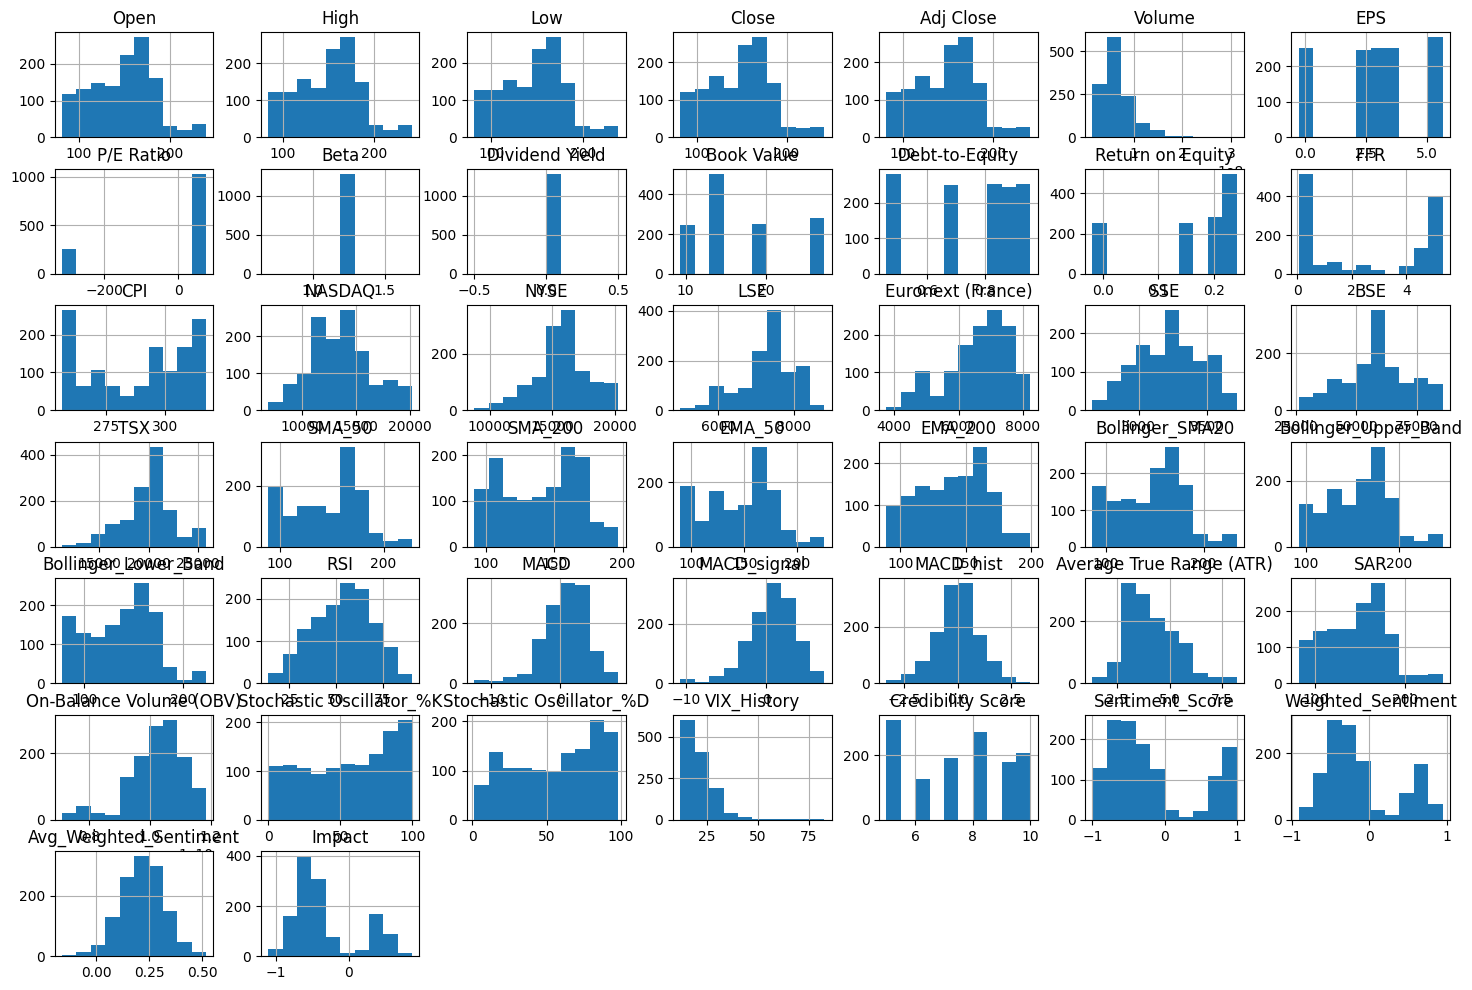

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(18, 12))
plt.show()


## Trend overtime

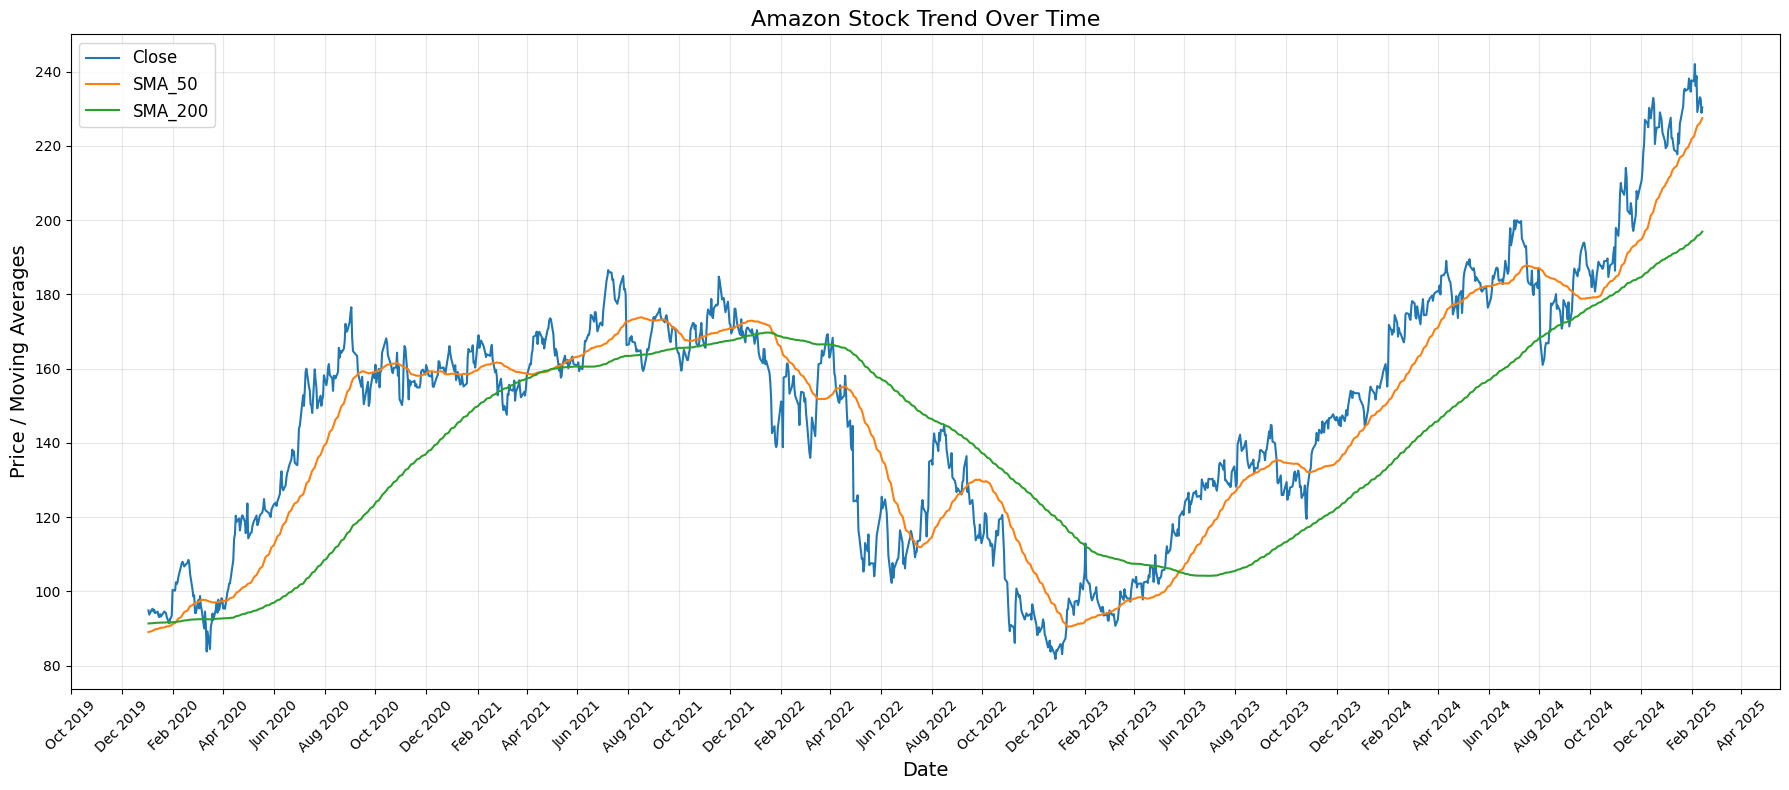

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load dataset
df = pd.read_csv("AMZN_Merged_Cleaned_Dataset.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df.set_index('Date', inplace=True)

# Define features to plot
features_to_plot = ['Close', 'SMA_50', 'SMA_200']

# Plot the selected features over time
plt.figure(figsize=(18, 8))
for feature in features_to_plot:
    plt.plot(df.index, df[feature], label=feature)

# Format the x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Add titles and labels
plt.title('Amazon Stock Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price / Moving Averages', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.3)

# Show the chart
plt.tight_layout()
plt.show()


## Correlation Analysis:

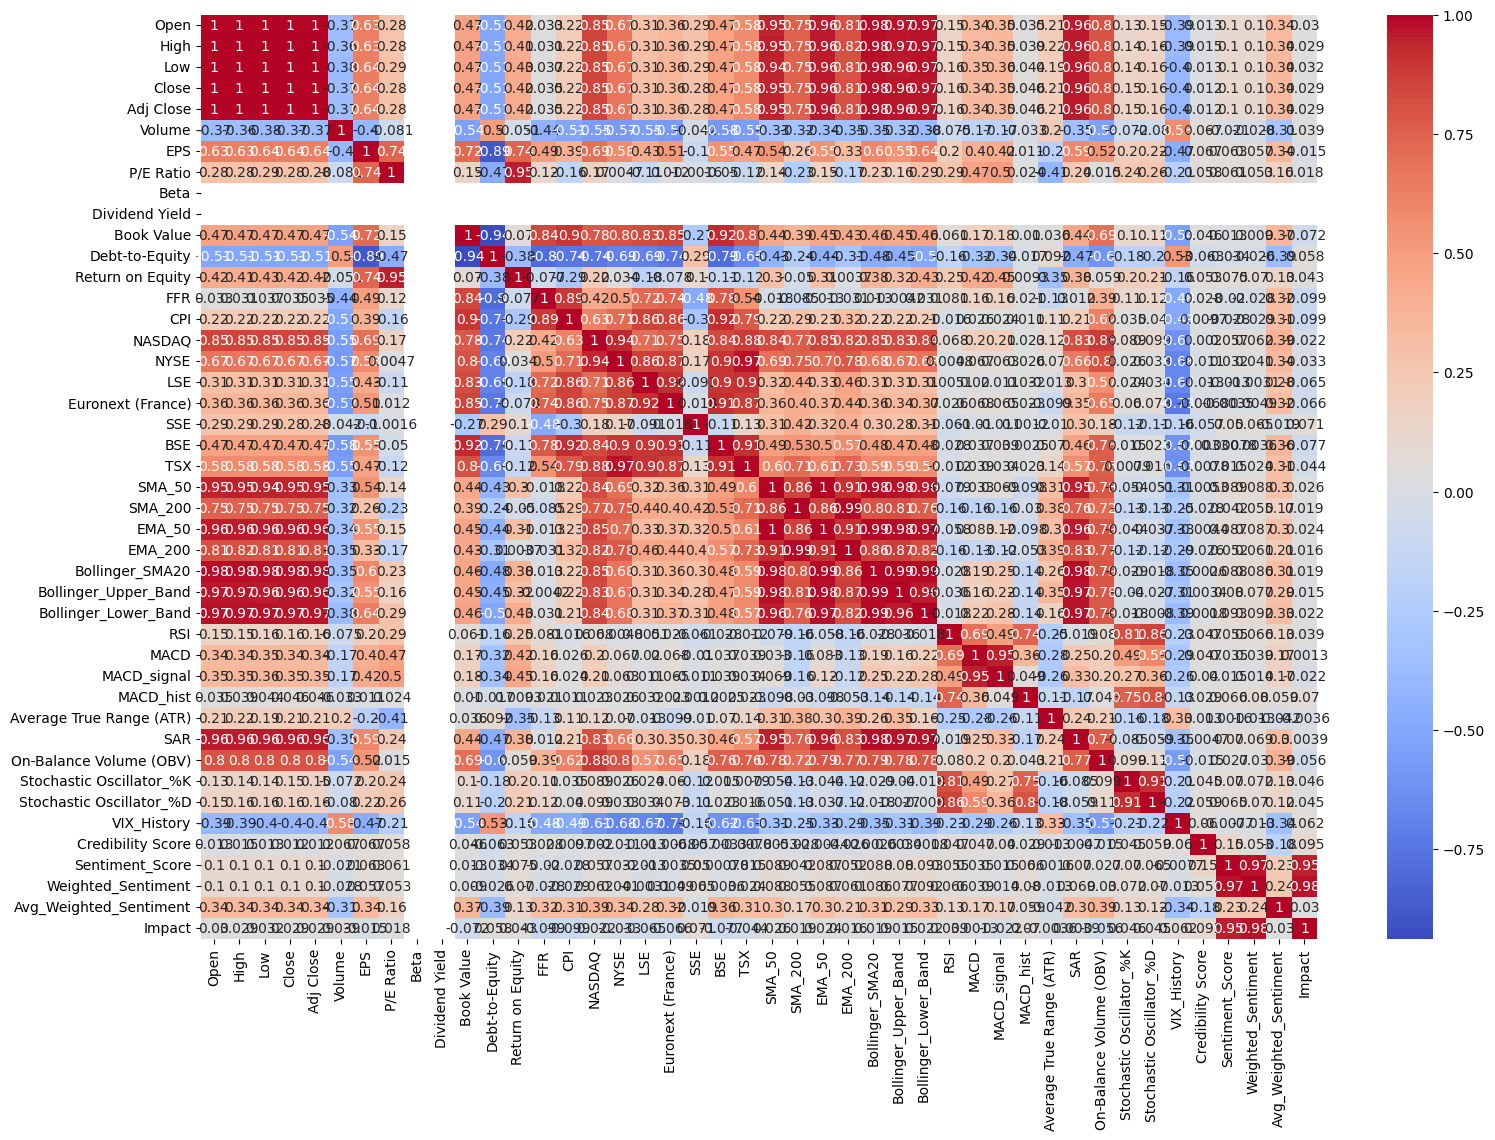

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(18, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Outlier Detection:

In [ ]:
df.boxplot(figsize=(19, 6))
plt.show()


Columns in DataFrame: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'EPS',
       'P/E Ratio', 'Beta', 'Dividend Yield', 'Book Value', 'Debt-to-Equity',
       'Return on Equity', 'FFR', 'CPI', 'NASDAQ', 'NYSE', 'LSE',
       'Euronext (France)', 'SSE', 'BSE', 'TSX', 'SMA_50', 'SMA_200', 'EMA_50',
       'EMA_200', 'Bollinger_SMA20', 'Bollinger_Upper_Band',
       'Bollinger_Lower_Band', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist',
       'Average True Range (ATR)', 'SAR', 'On-Balance Volume (OBV)',
       'Stochastic Oscillator_%K', 'Stochastic Oscillator_%D', 'VIX_History',
       'Title', 'Text', 'URL', 'Site', 'Credibility Score', 'Cleaned_Text',
       'Sentiment_Score', 'Weighted_Sentiment', 'Avg_Weighted_Sentiment',
       'Impact', 'Impact_Direction'],
      dtype='object')
Error: 'Date' column not found in the DataFrame.
Correlation Matrix:
                               Open      High       Low     Close  Adj Close  \
Open                      1.000000  0.999000

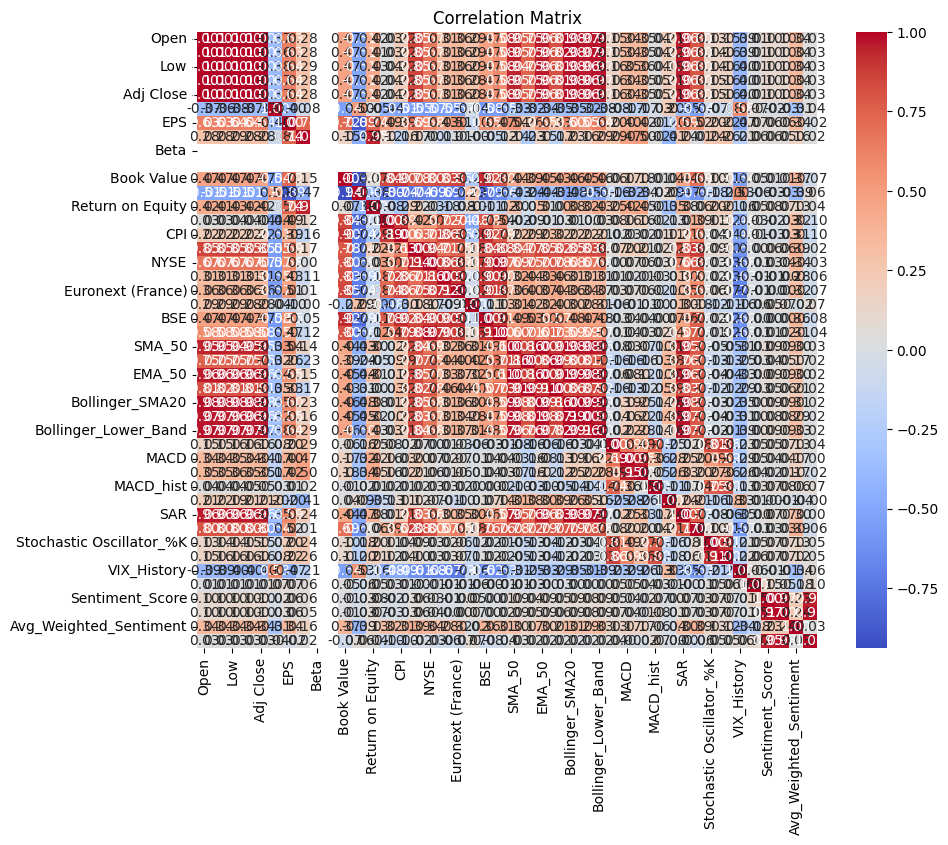

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names
print("Columns in DataFrame:", df.columns)

# Ensure 'Date' column exists and convert to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    print("Error: 'Date' column not found in the DataFrame.")

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Ensure there are numerical columns
if numerical_df.empty:
    print("Error: No numerical columns available for correlation calculation.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numerical_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:\n", correlation_matrix)

    # Visualize the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix')
    plt.show()

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
df1 = df
df1

Open    High     Low   Close  Adj Close    Volume   EPS  \
Date                                                                        
2020-01-02   93.750000   94.90   93.21   94.90      94.90  80580000  2.13   
2020-01-03   93.225000   94.31   93.23   93.75      93.75  75288000  2.13   
2020-01-06   93.000000   95.18   93.00   95.14      95.14  81236000  2.13   
2020-01-07   95.225000   95.69   94.60   95.34      95.34  80898000  2.13   
2020-01-08   94.902000   95.55   94.32   94.60      94.60  70160000  2.13   
...                ...     ...     ...     ...        ...       ...   ...   
2025-02-07  232.500000  234.81  228.06  229.15     229.15  77539300  5.66   
2025-02-10  230.550003  233.92  229.20  233.14     233.14  35419900  5.66   
2025-02-11  231.919998  233.44  230.13  232.76     232.76  23713700  5.66   
2025-02-12  230.460007  231.18  228.16  228.93     228.93  32285200  5.66   
2025-02-13  228.850006  230.42  227.52  230.37     230.37  31346500  5.66   

            P/E Ratio   Beta  Dividend Yield  ...  \
Date                                          ...   
2020-01-02  76.344288  1.192               0  ...   
2020-01-03  76.344288  1.192               0  ...   
2020-01-06  76.344288  1.192               0  ...   
2020-01-07  76.344288  1.192               0  ...   
2020-01-08  76.344288  1.192               0  ...   
...               ...    ...             ...  ...   
2025-02-07  38.780574  1.192               0  ...   
2025-02-10  38.780574  1.192               0  ...   
2025-02-11  38.780574  1.192               0  ...   
2025-02-12  38.780574  1.192               0  ...   
2025-02-13  38.780574  1.192               0  ...   

                                                         Text  \
Date                                                            
2020-01-02  Some Amazon.com Inc. tech workers who are memb...   
2020-01-03  These well-known companies have competitive ad...   
2020-01-06  SEATTLE--(BUSINESS WIRE)--(NASDAQ: AMZN) ÃÂÃ...   
2020-01-07  An 8-year-old in Mississippi, a Georgia woman ...   
2020-01-08  A new study questions the policy of state and ...   
...                                                       ...   
2025-02-07  The business of generative AI teeters on an up...   
2025-02-10  U.S. stocks settled lower on Friday, with the ...   
2025-02-11  Market indexes continue to trade close to new ...   
2025-02-12  Most retailers aren't considered evergreen bus...   
2025-02-13  In 2023, Bank of America analyst Michael Hartn...   

                                                          URL  \
Date                                                            
2020-01-02  https://www.marketwatch.com/story/amazon-worke...   
2020-01-03  https://www.fool.com/investing/2020/01/03/3-wa...   
2020-01-06  https://www.businesswire.com/news/home/2020010...   
2020-01-07  https://www.geekwire.com/2020/ring-customers-c...   
2020-01-08  https://nypost.com/2020/01/08/no-more-amazons-...   
...                                                       ...   
2025-02-07  https://www.forbes.com/sites/petercohan/2025/0...   
2025-02-10  https://www.benzinga.com/25/02/43604668/this-a...   
2025-02-11  https://www.fool.com/investing/2025/02/11/2-su...   
2025-02-12  https://www.fool.com/investing/2025/02/12/3-ev...   
2025-02-13  https://www.fool.com/investing/2025/02/13/1-un...   

                        Site  Credibility Score  \
Date                                              
2020-01-02   marketwatch.com                  8   
2020-01-03          fool.com                  7   
2020-01-06  businesswire.com                  5   
2020-01-07      geekwire.com                  5   
2020-01-08        nypost.com                  5   
...                      ...                ...   
2025-02-07        forbes.com                  8   
2025-02-10      benzinga.com                  5   
2025-02-11          fool.com                  7   
2025-02-12          fool.com                  7   
2025-02-13          fo

Error: 'Date' column not found.


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


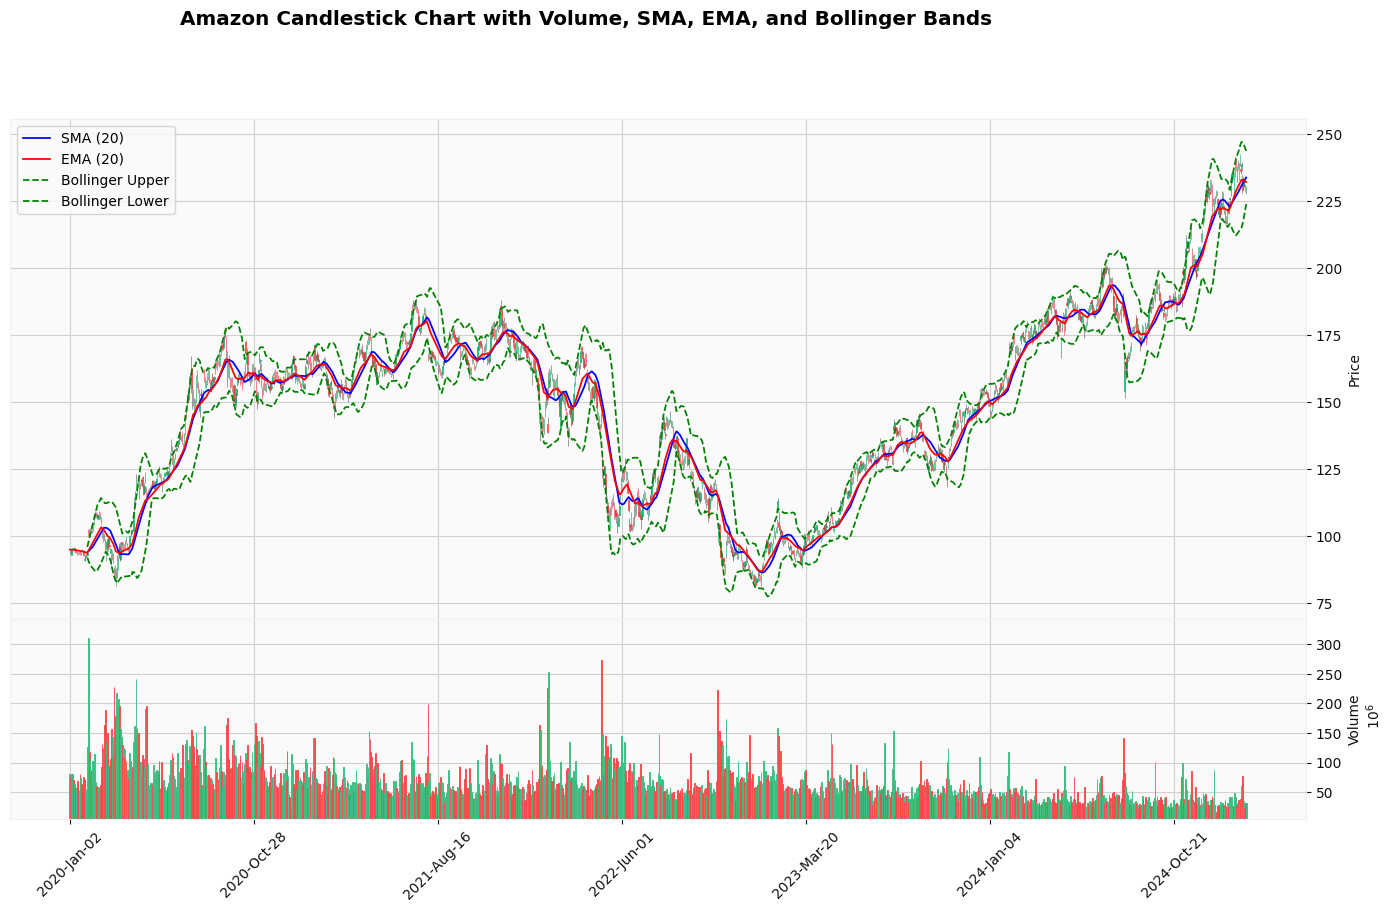

In [ ]:
import pandas as pd
import mplfinance as mpf

# Load the dataset and create a copy
df1 = df.copy()

# Ensure the Date column is in datetime format and set it as the index
if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'])
    df1.set_index('Date', inplace=True)
else:
    print("Error: 'Date' column not found.")

# Check required columns for candlestick plotting
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
if all(col in df1.columns for col in required_columns):
    # Calculate SMA, EMA, and Bollinger Bands
    df1['SMA'] = df1['Close'].rolling(window=20).mean()
    df1['EMA'] = df1['Close'].ewm(span=20, adjust=False).mean()
    df1['BB_upper'] = df1['Close'].rolling(window=20).mean() + 2 * df1['Close'].rolling(window=20).std()
    df1['BB_lower'] = df1['Close'].rolling(window=20).mean() - 2 * df1['Close'].rolling(window=20).std()

    # Define additional plots for SMA, EMA, and Bollinger Bands
    add_plots = [
        mpf.make_addplot(df1['SMA'], color='blue', label='SMA (20)'),
        mpf.make_addplot(df1['EMA'], color='red', label='EMA (20)'),
        mpf.make_addplot(df1['BB_upper'], color='green', linestyle='dashed', label='Bollinger Upper'),
        mpf.make_addplot(df1['BB_lower'], color='green', linestyle='dashed', label='Bollinger Lower')
    ]

    # Plot the candlestick chart with volume and additional indicators
    mpf.plot(
        df1,
        type='candle',  # Candlestick chart
        volume=True,  # Include volume in a separate panel
        addplot=add_plots,
        style='yahoo',  # Chart style
        title='Amazon Candlestick Chart with Volume, SMA, EMA, and Bollinger Bands',
        ylabel='Price',
        ylabel_lower='Volume',
        figsize=(18, 10)
    )
else:
    print("Error: Missing one or more required columns for candlestick plotting:", required_columns)


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Prepare the data
# The 'Date' column is already the index, so no need to set it again.
# df1['Date'] = pd.to_datetime(df1['Date'])  # Remove this line
# df1.set_index('Date', inplace=True)  # Remove this line

# Reset index to bring 'Date' back as a column if you need it for calculations:
df1 = df1.reset_index()

# Define a function to calculate SMA and Bollinger Bands
def calculate_indicators(df, window=20):
    df['SMA'] = df['Close'].rolling(window).mean()
    df['BB_Upper'] = df['SMA'] + (df['Close'].rolling(window).std() * 2)
    df['BB_Lower'] = df['SMA'] - (df['Close'].rolling(window).std() * 2)
    return df

# Apply the indicators
df1 = calculate_indicators(df1) # Changed data to df1

# Define a function to filter data based on the time range
def filter_data(df, period):
    end_date = df['Date'].max() # Changed df.index.max() to df['Date'].max()
    if period == "1D":
        start_date = end_date - pd.Timedelta(days=1)
    elif period == "7D":
        start_date = end_date - pd.Timedelta(days=7)
    elif period == "30D":
        start_date = end_date - pd.Timedelta(days=30)
    elif period == "1Y":
        start_date = end_date - pd.DateOffset(years=1)
    elif period == "5Y":
        start_date = end_date - pd.DateOffset(years=5)
    elif period == "10Y":
        start_date = end_date - pd.DateOffset(years=10)
    else:
        start_date = df['Date'].min() # Changed df.index.min() to df['Date'].min()
    return df[(df['Date'] >= start_date) & (df['Date'] <= end_date)] # Changed df.loc[start_date:end_date]

# Filter for the last 1 year by default
filtered_data = filter_data(df1, "1Y")

# Set 'Date' as index for the filtered data for plotting
filtered_data = filtered_data.set_index('Date') # Set 'Date' as index for filtered_data

# Create the candlestick chart with volume, SMA, and Bollinger Bands
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=filtered_data.index,
    open=filtered_data['Open'],
    high=filtered_data['High'],
    low=filtered_data['Low'],
    close=filtered_data['Close'],
    name='Candlestick',
))

# SMA
fig.add_trace(go.Scatter(
    x=filtered_data.index,
    y=filtered_data['SMA'],
    mode='lines',
    name='SMA',
    line=dict(color='blue', width=1.5),
))

# Bollinger Bands
fig.add_trace(go.Scatter(
    x=filtered_data.index,
    y=filtered_data['BB_Upper'],
    mode='lines',
    name='BB Upper',
    line=dict(color='rgba(173, 216, 230, 0.5)', width=1),
))
fig.add_trace(go.Scatter(
    x=filtered_data.index,
    y=filtered_data['BB_Lower'],
    mode='lines',
    name='BB Lower',
    line=dict(color='rgba(173, 216, 230, 0.5)', width=1),
    fill='tonexty',  # Fill between upper and lower bands
    fillcolor='rgba(173, 216, 230, 0.2)',
))

# Volume
fig.add_trace(go.Bar(
    x=filtered_data.index,
    y=filtered_data['Volume'],
    name='Volume',
    marker=dict(color='rgba(128, 128, 128, 0.5)'),
    yaxis='y2',
))

# Layout adjustments
fig.update_layout(
    title='Amazon Candlestick Chart with Volume, SMA, and Bollinger Bands',
    yaxis_title='Stock Price',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
    ),
    xaxis_title='Date',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template='plotly_dark',
)

# Show the chart
fig.show()


## Correlation between fundamentals and stock closing price

In [ ]:
# Select fundamental features and the closing price
fundamental_features = ['P/E Ratio', 'EPS', 'Beta', 'Dividend Yield', 'Book Value',	'Debt-to-Equity',	'Return on Equity']
correlation_fundamentals = df[fundamental_features + ['Close']].corr()

# Extract correlations with Close price
correlation_with_close = correlation_fundamentals['Close'].sort_values(ascending=False)

# Display correlations
print(correlation_with_close)


Close               1.000000
EPS                 0.635870
Book Value          0.469544
Return on Equity    0.420888
P/E Ratio           0.284242
Debt-to-Equity     -0.510331
Beta                     NaN
Dividend Yield           NaN
Name: Close, dtype: float64


Correlation with Close Price:
Close               1.000000
EPS                 0.635870
Book Value          0.469544
Return on Equity    0.420888
P/E Ratio           0.284242
Debt-to-Equity     -0.510331
Beta                     NaN
Dividend Yield           NaN
Name: Close, dtype: float64


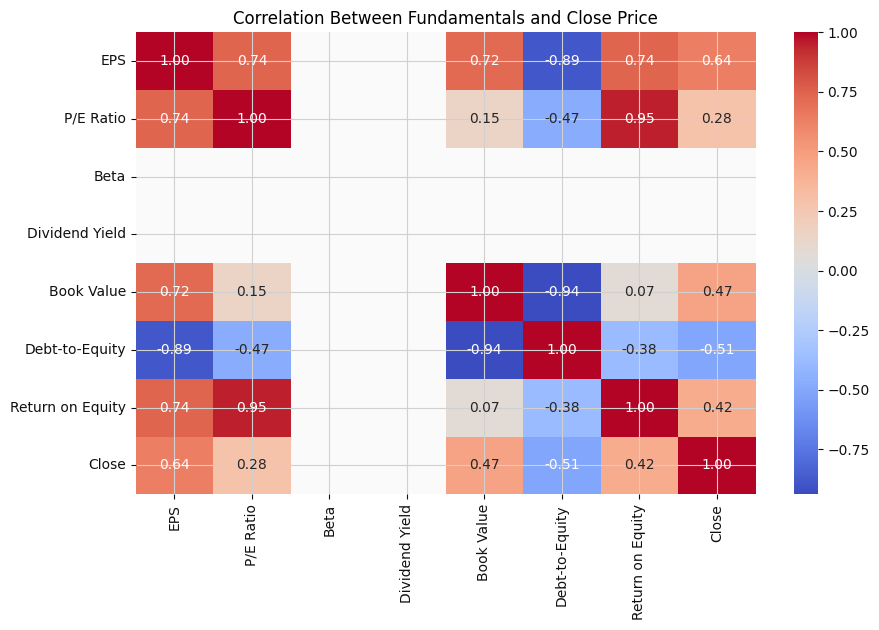

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select fundamental features and the closing price
fundamental_features = ['EPS', 'P/E Ratio', 'Beta', 'Dividend Yield',
                        'Book Value', 'Debt-to-Equity', 'Return on Equity']
correlation_fundamentals = df[fundamental_features + ['Close']].corr()

# Extract correlations with Close price
correlation_with_close = correlation_fundamentals['Close'].sort_values(ascending=False)

# Display correlations
print("Correlation with Close Price:")
print(correlation_with_close)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_fundamentals, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Fundamentals and Close Price")
plt.show()


## Correlation betwen close and FFR	CPI


In [ ]:
# Select relevant features: Close, FFR, and CPI
features_to_analyze = ['Close', 'FFR', 'CPI']  # Replace with actual column names
correlation_matrix = df[features_to_analyze].corr()

# Extract correlations with Close price
correlation_with_close = correlation_matrix['Close'].sort_values(ascending=False)

# Display correlations
print("Correlation with Close Price:")
print(correlation_with_close)


Correlation with Close Price:
Close    1.000000
CPI      0.218074
FFR      0.035324
Name: Close, dtype: float64


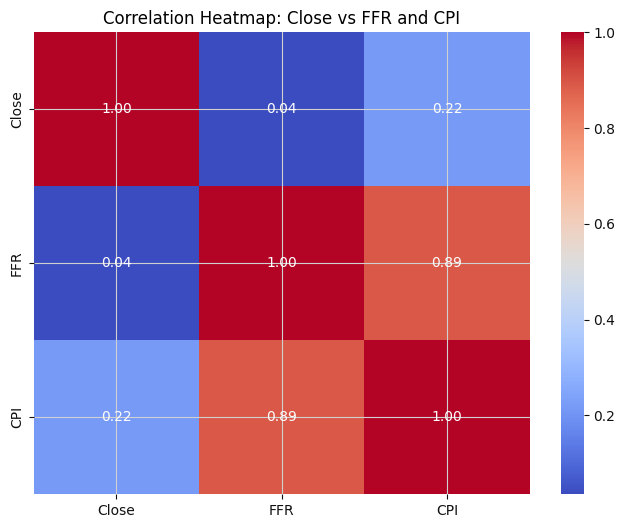

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
features_to_analyze = ['Close', 'FFR', 'CPI']
correlation_matrix = df[features_to_analyze].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Close vs FFR and CPI")
plt.show()


## Correlation between Close and Global Indexes

Correlation Matrix:
                      Close    NASDAQ      NYSE       LSE  Euronext (France)  \
Close              1.000000  0.852769  0.673200  0.308704           0.360945   
NASDAQ             0.852769  1.000000  0.937359  0.710087           0.751042   
NYSE               0.673200  0.937359  1.000000  0.864262           0.866051   
LSE                0.308704  0.710087  0.864262  1.000000           0.924047   
Euronext (France)  0.360945  0.751042  0.866051  0.924047           1.000000   
SSE                0.283966  0.183979  0.174535 -0.091464          -0.017888   
BSE                0.472520  0.836865  0.898555  0.899998           0.911383   
TSX                0.578184  0.883463  0.971752  0.904724           0.873091   

                        SSE       BSE       TSX  
Close              0.283966  0.472520  0.578184  
NASDAQ             0.183979  0.836865  0.883463  
NYSE               0.174535  0.898555  0.971752  
LSE               -0.091464  0.899998  0.904724  
Euronext 

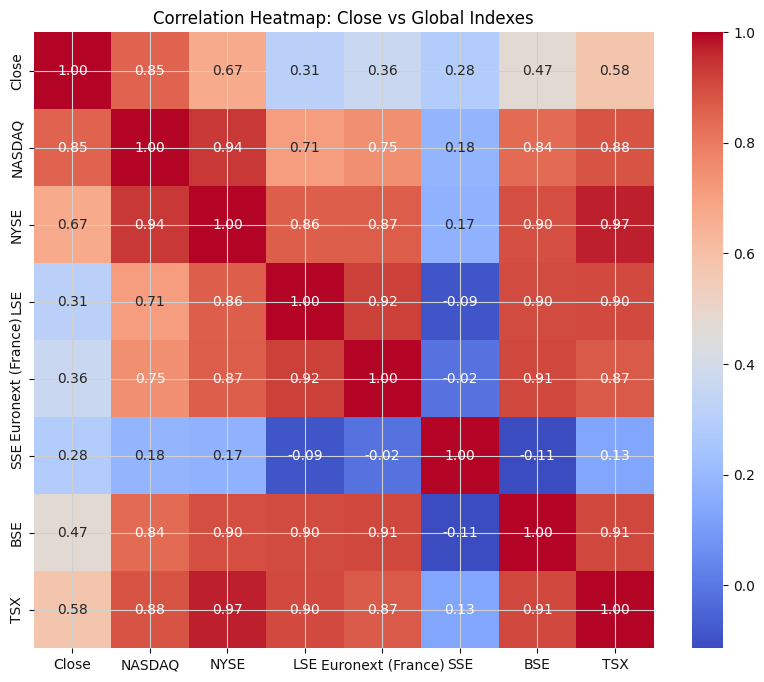

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features to analyze
features_to_analyze = ['Close', 'NASDAQ', 'NYSE', 'LSE', 'Euronext (France)', 'SSE', 'BSE', 'TSX']

# Compute the correlation matrix
correlation_matrix = df[features_to_analyze].corr()

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(correlation_matrix)

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Close vs Global Indexes")
plt.show()


## Correlation Matrix: Close vs Technical Indicators

Correlation Matrix:
                             Close    SMA_50   SMA_200    EMA_50   EMA_200  \
Close                     1.000000  0.945028  0.750366  0.958726  0.811281   
SMA_50                    0.945028  1.000000  0.857519  0.997289  0.911113   
SMA_200                   0.750366  0.857519  1.000000  0.860086  0.989465   
EMA_50                    0.958726  0.997289  0.860086  1.000000  0.912314   
EMA_200                   0.811281  0.911113  0.989465  0.912314  1.000000   
Bollinger_SMA20           0.976882  0.979511  0.796005  0.988377  0.857145   
Bollinger_Upper_Band      0.962919  0.975844  0.814907  0.983599  0.871481   
Bollinger_Lower_Band      0.969697  0.961673  0.758990  0.971485  0.823479   
RSI                       0.160125 -0.078961 -0.159444 -0.057989 -0.155053   
MACD                      0.343534  0.032930 -0.161512  0.083264 -0.126253   
MACD_signal               0.352626  0.068814 -0.162997  0.122613 -0.117363   
MACD_hist                 0.046202 -0.098039

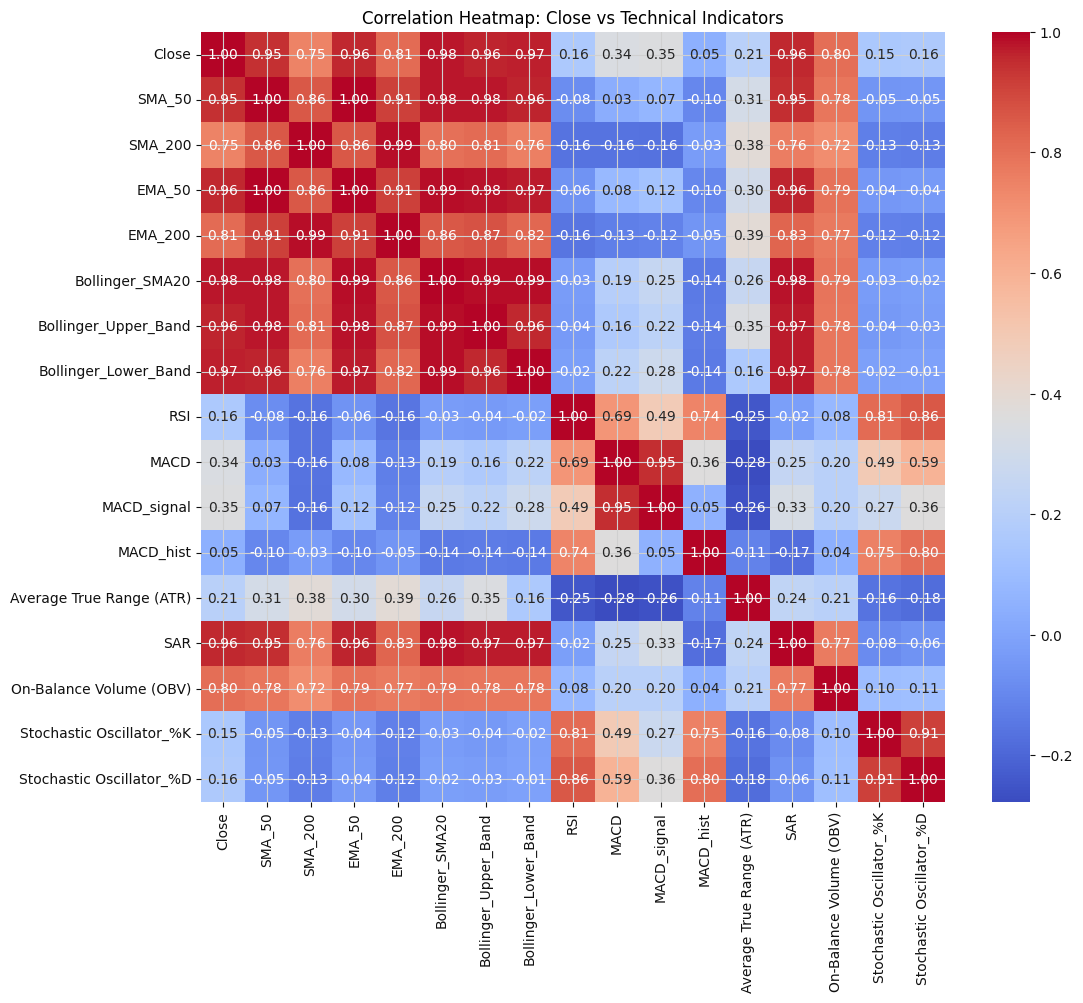

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of technical indicators and Close price
features_to_analyze = [
    'Close', 'SMA_50', 'SMA_200', 'EMA_50', 'EMA_200',
    'Bollinger_SMA20', 'Bollinger_Upper_Band', 'Bollinger_Lower_Band',
    'RSI', 'MACD', 'MACD_signal', 'MACD_hist',
    'Average True Range (ATR)', 'SAR', 'On-Balance Volume (OBV)',
    'Stochastic Oscillator_%K', 'Stochastic Oscillator_%D'
]

# Calculate the correlation matrix
correlation_matrix = df[features_to_analyze].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Close vs Technical Indicators")
plt.show()


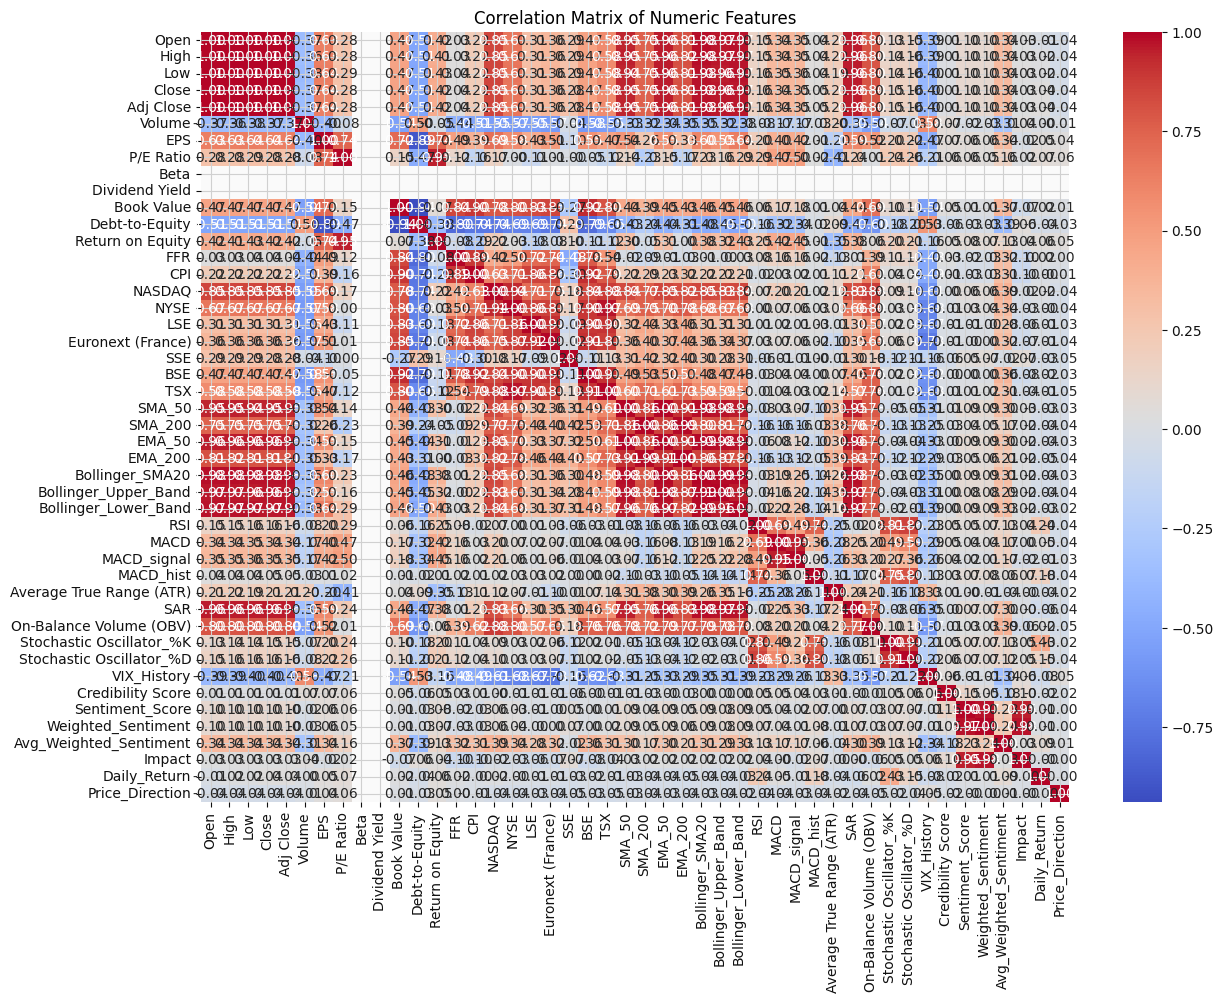

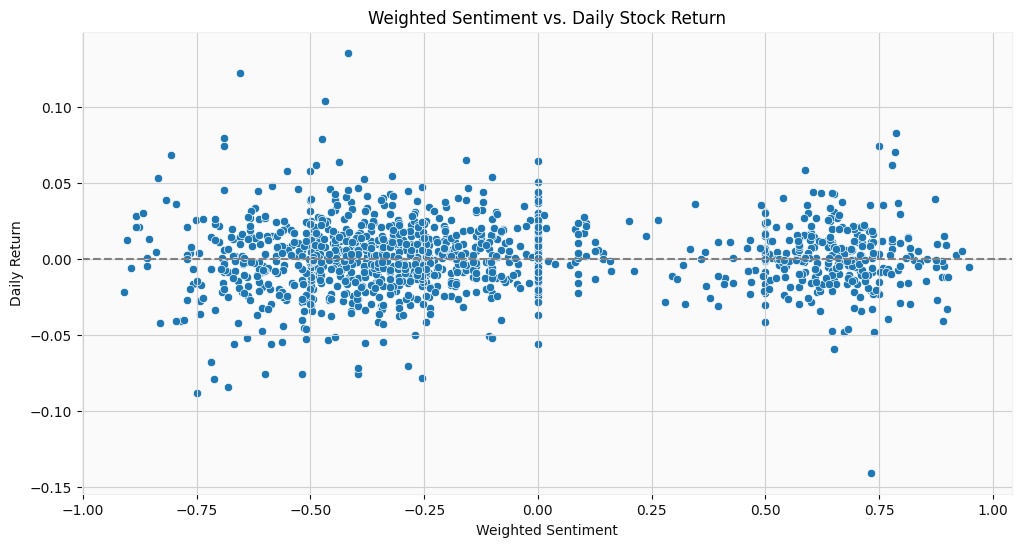

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert Date column to datetime if not already
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])

# Create daily return
df['Daily_Return'] = df['Close'].pct_change()

# Create target column: price direction (1 if price goes up, 0 if it goes down or stays)
df['Price_Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Plot sentiment vs price change
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Weighted_Sentiment', y='Daily_Return', data=df)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Weighted Sentiment vs. Daily Stock Return")
plt.xlabel("Weighted Sentiment")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

# Plot rolling average of sentiment vs returns
df['Rolling_Sentiment'] = df['Weighted_Sentiment'].rolling(window=7).mean()
df['Rolling_Return'] = df['Daily_Return'].rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Rolling_Sentiment'], label='7-day Avg Sentiment', color='blue')
plt.plot(df['Date'], df['Rolling_Return'], label='7-day Avg Return', color='green')
plt.title("7-Day Rolling Average: Sentiment vs Stock Return")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



## Model Development

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop(['Close', 'Date', 'Title',	'Text',	'URL',	'Site',	'Cleaned_Text',	'Impact_Direction'], axis=1)
y = df1[['Close']]

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=0)

In [ ]:
model.score(X_train, y_train)

0.9999765161098093

In [ ]:
model.score(X_test, y_test)

0.9998092429299456

In [ ]:
model.feature_importances_

array([4.36417956e-03, 1.83739568e-02, 3.55569758e-02, 9.33508329e-01,
       8.41908227e-06, 2.38391535e-07, 1.81615318e-07, 0.00000000e+00,
       0.00000000e+00, 3.29890757e-07, 2.44550889e-07, 2.67733031e-07,
       7.18592330e-04, 4.35132221e-06, 9.66074991e-04, 1.77294420e-05,
       6.82283903e-06, 1.49147787e-05, 1.26066004e-05, 2.46760057e-06,
       6.79196984e-06, 4.95265430e-04, 2.35249380e-03, 7.03621727e-04,
       2.53790779e-04, 1.06198482e-03, 4.19822082e-04, 1.26987848e-04,
       7.65417047e-06, 6.32093257e-06, 4.09084284e-06, 1.02626699e-05,
       8.38653447e-06, 4.94461788e-06, 4.55942668e-05, 5.06956949e-06,
       4.57002666e-06, 8.73906338e-06, 3.45839924e-06, 6.68895617e-06,
       4.83168356e-06, 4.56910356e-06, 7.94367425e-06, 1.04005847e-05,
       6.20616641e-04, 1.49840546e-04, 1.00000051e-04, 6.58948148e-06,
       1.98748511e-06])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
new_series = pd.Series(data = model.feature_importances_, index = model.feature_names_in_)
new_series

Open                        4.364180e-03
High                        1.837396e-02
Low                         3.555698e-02
Adj Close                   9.335083e-01
Volume                      8.419082e-06
EPS                         2.383915e-07
P/E Ratio                   1.816153e-07
Beta                        0.000000e+00
Dividend Yield              0.000000e+00
Book Value                  3.298908e-07
Debt-to-Equity              2.445509e-07
Return on Equity            2.677330e-07
FFR                         7.185923e-04
CPI                         4.351322e-06
NASDAQ                      9.660750e-04
NYSE                        1.772944e-05
LSE                         6.822839e-06
Euronext (France)           1.491478e-05
SSE                         1.260660e-05
BSE                         2.467601e-06
TSX                         6.791970e-06
SMA_50                      4.952654e-04
SMA_200                     2.352494e-03
EMA_50                      7.036217e-04
EMA_200                     2.537908e-04
Bollinger_SMA20             1.061985e-03
Bollinger_Upper_Band        4.198221e-04
Bollinger_Lower_Band        1.269878e-04
RSI                         7.654170e-06
MACD                        6.320933e-06
MACD_signal                 4.090843e-06
MACD_hist                   1.026267e-05
Average True Range (ATR)    8.386534e-06
SAR                         4.944618e-06
On-Balance Volume (OBV)     4.559427e-05
Stochastic Oscillator_%K    5.069569e-06
Stochastic Oscillator_%D    4.570027e-06
VIX_History                 8.739063e-06
Credibility Score           3.458399e-06
Sentiment_Score             6.688956e-06
Weighted_Sentiment          4.831684e-06
Avg_Weighted_Sentiment      4.569104e-06
Impact                      7.943674e-06
SMA                         1.040058e-05
EMA                         6.206166e-04
BB_upper                    1.498405e-04
BB_lower                    1.000001e-04
BB_Upper                    6.589481e-06
BB_Lower                    1.987485e-06
dtype: float64

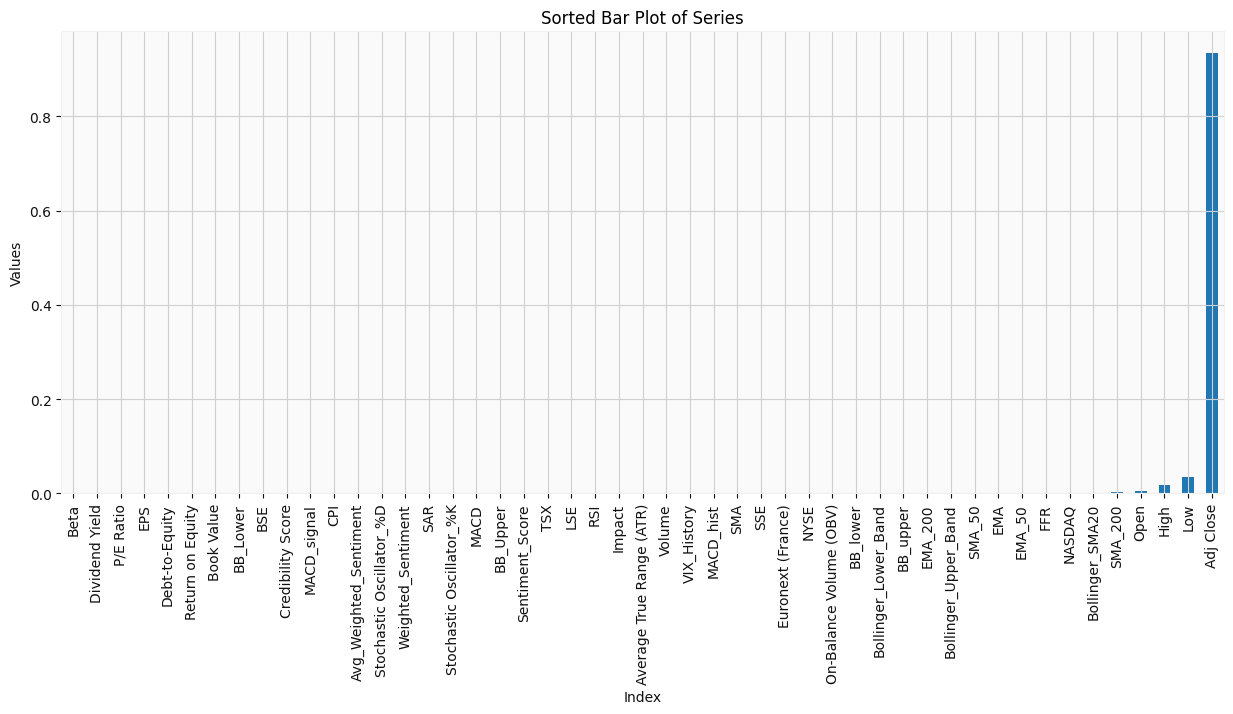

In [ ]:
import matplotlib.pyplot as plt

# Example: Plotting a series with figsize
plt.figure(figsize=(15, 6))  # Set the figure size (width, height)
new_series.sort_values().plot(kind='bar')

# Optional: Add labels and title for better visualization
plt.title("Sorted Bar Plot of Series")
plt.xlabel("Index")
plt.ylabel("Values")

plt.show()

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

In [ ]:
r2_score(y_test, model.predict(X_test))

0.9998092429299456

In [ ]:
root_mean_squared_error(y_test, model.predict(X_test))

0.44586640035862496

In [ ]:
mean_squared_error(y_test, model.predict(X_test))

0.19879684696875763

In [ ]:
mean_absolute_error(y_test, model.predict(X_test))

0.19914468749999759

# LSTM (Long-Short Term Memory)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


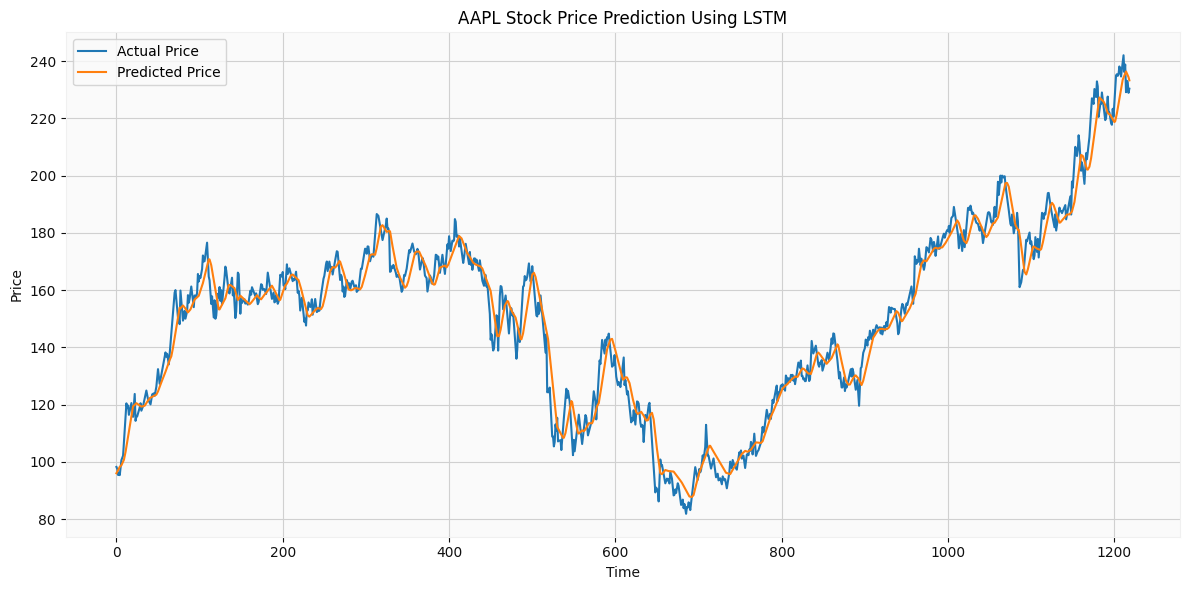

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data again
file_path = "AMZN_Merged_Cleaned_Dataset.csv"
df1 = pd.read_csv(file_path)

# Convert date column to datetime if 'Date' is a column, otherwise skip
if 'Date' in df1.columns:
    df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'
    df1.set_index('Date', inplace=True)
else:
    print("Column 'Date' not found. Assuming it is already the index.")

# Use only the 'Close' column for prediction
data = df1[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare training data
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape input for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Predict on training data
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("AAPL Stock Price Prediction Using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0729
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0033
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0018
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0018
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0018
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0018
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0014
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - loss: 0.0019
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0016
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0015
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


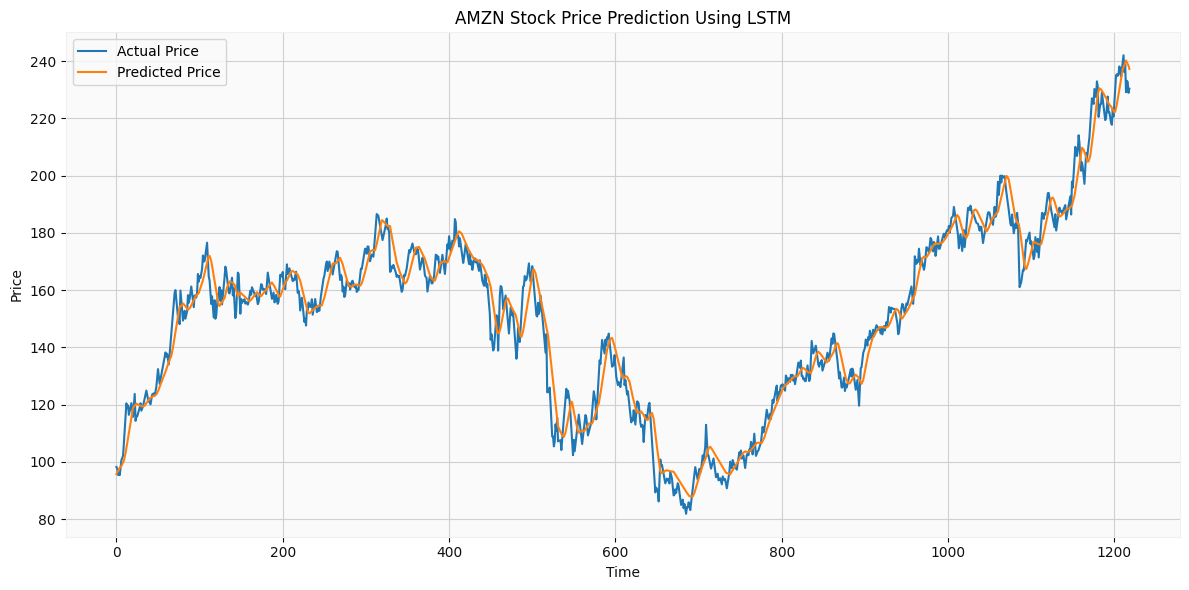

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AMZN_Merged_Cleaned_Dataset.csv") # Reload the DataFrame

# Preprocess
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'
# df.set_index('Date', inplace=True) # Removed, 'Date' is likely already the index

# Ensure 'Date' is datetime and set it as index if not already
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df.set_index('Date', inplace=True)
else:
    print("Date column not found or already set as index.")

data = df[['Close']]

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
seq_len = 60
X, y = [], []
for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Build model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Predict
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y)

# Plot
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("AMZN Stock Price Prediction Using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Load the dataset
file_path = "AMZN_Merged_Cleaned_Dataset.csv"
df = pd.read_csv(file_path)

# Prepare data for ARIMA
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'
df.set_index('Date', inplace=True)
close_data = df['Close'].asfreq('B').fillna(method='ffill')  # Ensure business day frequency

# Split training and testing: Using a percentage split
# For example, using the last 20% of data for testing
train_size = int(len(close_data) * 0.8)
train_data, test_data = close_data[:train_size], close_data[train_size:]


# Fit ARIMA model on training data
model = ARIMA(train_data, order=(5, 1, 0))  # Can be tuned further
model_fit = model.fit()

# Forecast the test period
forecast = model_fit.forecast(steps=len(test_data))
forecast.index = test_data.index

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(train_data.index[-60:], train_data[-60:], label='Training Data (Last 60 Days)', color='gray')
plt.plot(test_data.index, test_data, label='Actual Price', marker='o', color='black')
plt.plot(forecast.index, forecast, label='Predicted Price (ARIMA)', linestyle='--', color='blue')
plt.title("AMZN Actual vs ARIMA Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-50-6b80cc12fc2d>:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your data
df = pd.read_csv("AMZN_Merged_Cleaned_Dataset.csv")

# --- Feature Engineering ---
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Sentiment'] = df['Weighted_Sentiment'].rolling(window=3).mean()
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop NA (from pct_change, rolling, shift)
df = df.dropna()

# Features and target
features = ['Weighted_Sentiment', 'Avg_Weighted_Sentiment', 'Impact', 'Daily_Return', 'Rolling_Sentiment']
X = df[features]
y = df['Target']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Logistic Regression ---
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Evaluation ---
print("📊 Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("🌲 Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📊 Logistic Regression Results
[[ 17 106]
 [ 23 110]]
              precision    recall  f1-score   support

           0       0.42      0.14      0.21       123
           1       0.51      0.83      0.63       133

    accuracy                           0.50       256
   macro avg       0.47      0.48      0.42       256
weighted avg       0.47      0.50      0.43       256

🌲 Random Forest Results
[[59 64]
 [67 66]]
              precision    recall  f1-score   support

           0       0.47      0.48      0.47       123
           1       0.51      0.50      0.50       133

    accuracy                           0.49       256
   macro avg       0.49      0.49      0.49       256
weighted avg       0.49      0.49      0.49       256



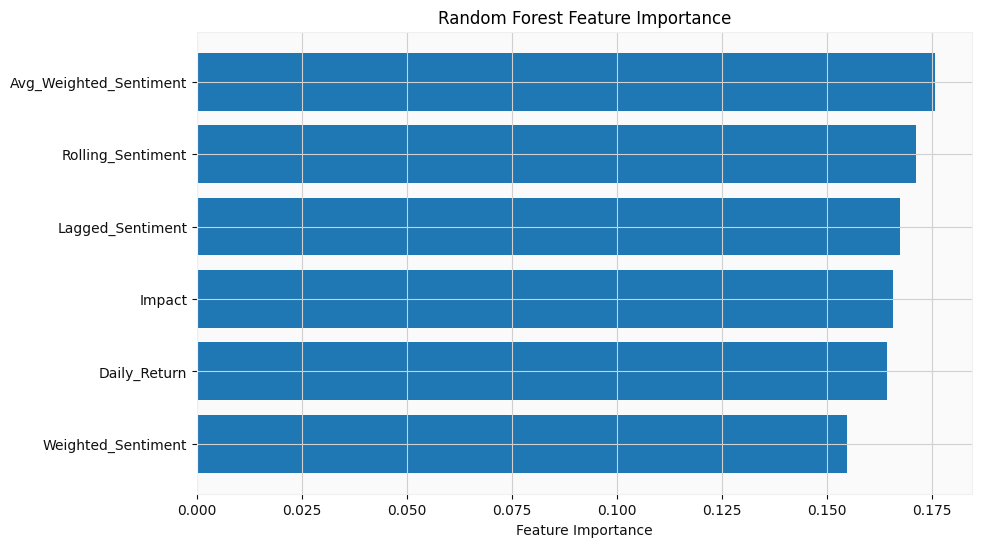

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt

# Reload the data
df = pd.read_csv("AMZN_Merged_Cleaned_Dataset.csv")

# Feature engineering
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Sentiment'] = df['Weighted_Sentiment'].rolling(window=3).mean()
df['Lagged_Sentiment'] = df['Weighted_Sentiment'].shift(1)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

# Feature and target selection
features = ['Weighted_Sentiment', 'Avg_Weighted_Sentiment', 'Impact', 'Daily_Return', 'Rolling_Sentiment', 'Lagged_Sentiment']
X = df[features]
y = df['Target']

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Grid search on Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(X, y)

# Best model
best_rf = grid_search.best_estimator_

# Feature importance plot
importances = best_rf.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.grid(True)
plt.show()

# Output best parameters
grid_search.best_params_


 99%|===================| 2536/2554 [01:02<00:00]       

<Figure size 640x480 with 0 Axes>

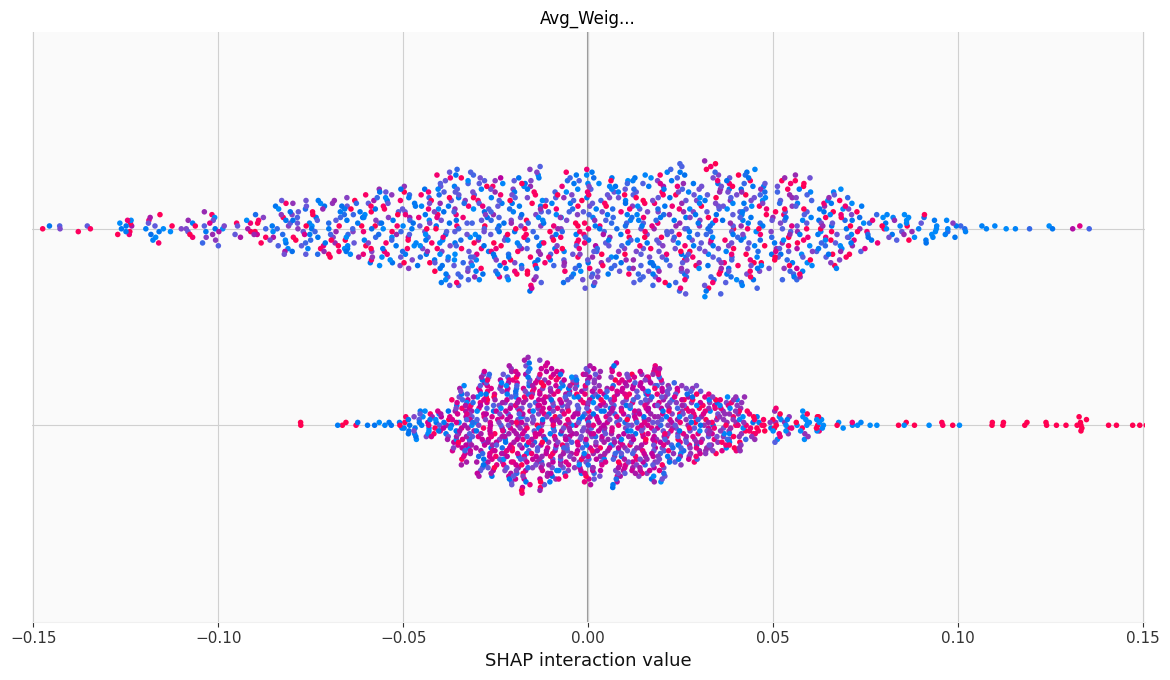

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset again
df = pd.read_csv("AMZN_Merged_Cleaned_Dataset.csv")
# df = pd.read_csv(file_path)  # Remove this redundant line

# Feature engineering
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Sentiment'] = df['Weighted_Sentiment'].rolling(window=3).mean()
df['Lagged_Sentiment'] = df['Weighted_Sentiment'].shift(1)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

# Define features and target
features = ['Weighted_Sentiment', 'Avg_Weighted_Sentiment', 'Impact',
            'Daily_Return', 'Rolling_Sentiment', 'Lagged_Sentiment']
X = df[features]
y = df['Target']

# Train the best Random Forest model from previous step
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42)
rf_model.fit(X, y)

# Use SHAP for interpretability
# explainer = shap.TreeExplainer(rf_model) #Removed line
# shap_values = explainer.shap_values(X)  #Removed line

explainer = shap.Explainer(rf_model, X) #Changed shap.TreeExplainer(rf_model) to shap.Explainer(rf_model, X)
shap_values = explainer.shap_values(X) #Changed shap_values = explainer(X) to shap_values = explainer.shap_values(X)


# Plot summary for class 1 (price increase)
# Select SHAP values for class 1 only
# shap.plots.bar(shap_values) #Removed line
shap.summary_plot(shap_values, X) #Added shap.summary_plot(shap_values, X) to create a summary plot.

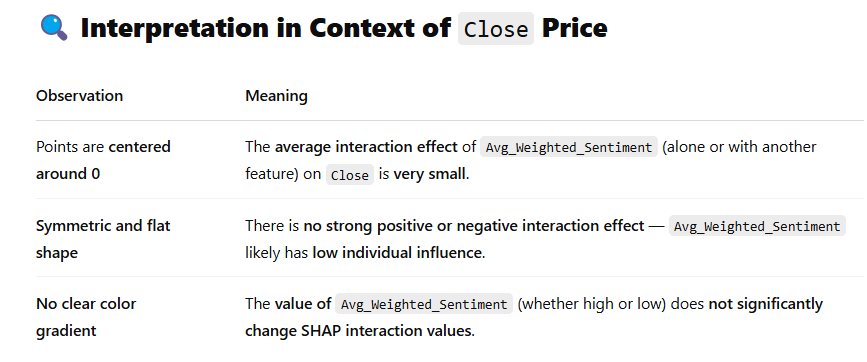

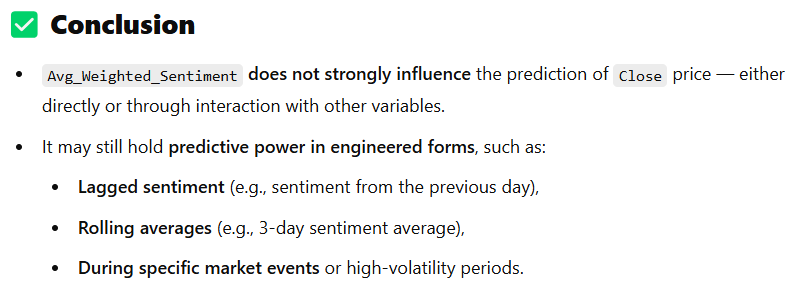

In [ ]:
correlation = df['Close'].corr(df['Weighted_Sentiment'], method='pearson')
print(f"Pearson Correlation: {correlation:.4f}")


Pearson Correlation: 0.1047


In [ ]:
spearman_corr = df['Close'].corr(df['Weighted_Sentiment'], method='spearman')
print(f"Spearman Correlation: {spearman_corr:.4f}")


Spearman Correlation: 0.1340


Correlation between Weighted Sentiment and Next Day Close: 0.1012


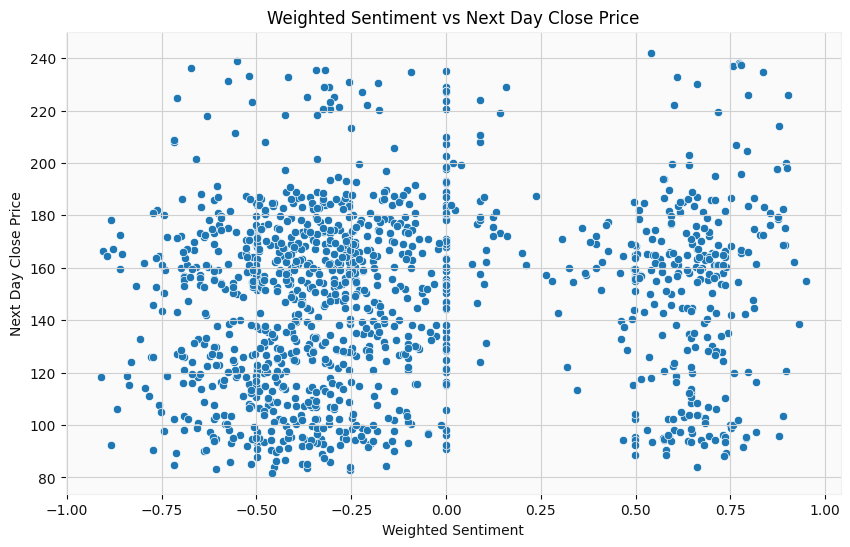

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Shift the Close price backward to align it with previous day's sentiment
df['Next_Close'] = df['Close'].shift(-1)

# Drop any resulting NaN values
df = df.dropna(subset=['Weighted_Sentiment', 'Next_Close'])

# 1. Correlation Coefficient
corr = df['Weighted_Sentiment'].corr(df['Next_Close'])
print(f"Correlation between Weighted Sentiment and Next Day Close: {corr:.4f}")

# 2. Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weighted_Sentiment', y='Next_Close', data=df)
plt.title('Weighted Sentiment vs Next Day Close Price')
plt.xlabel('Weighted Sentiment')
plt.ylabel('Next Day Close Price')
plt.grid(True)
plt.show()


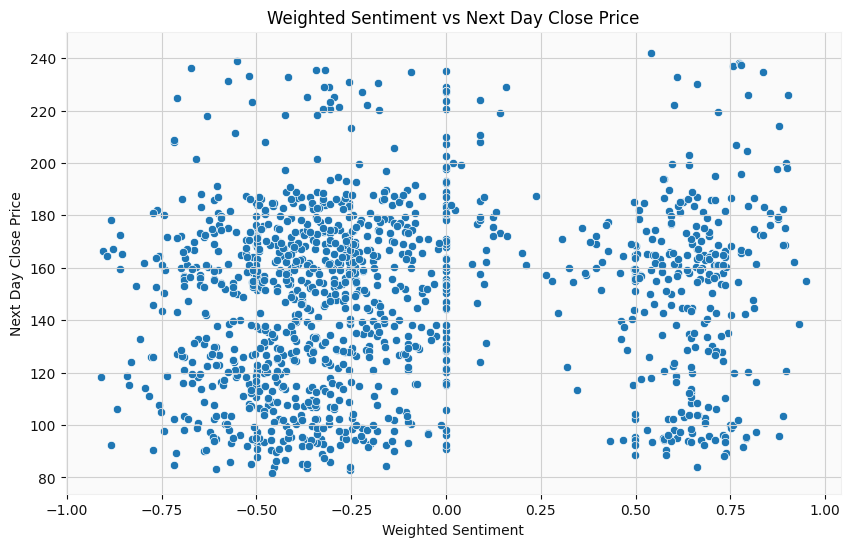

(np.float64(0.0974624768404649), np.float64(0.12747707393611674))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the Excel file and access 'AMZN' sheet
file_path = "AMZN_Merged_Cleaned_Dataset.csv"
df = pd.read_csv(file_path)

# Shift Close to get next day's Close price
df['Next_Close'] = df['Close'].shift(-1)

# Drop NA values
df.dropna(subset=['Weighted_Sentiment', 'Next_Close'], inplace=True)

# Calculate Pearson and Spearman correlations
pearson_corr = df['Weighted_Sentiment'].corr(df['Next_Close'], method='pearson')
spearman_corr = df['Weighted_Sentiment'].corr(df['Next_Close'], method='spearman')

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weighted_Sentiment', y='Next_Close', data=df)
plt.title('Weighted Sentiment vs Next Day Close Price')
plt.xlabel('Weighted Sentiment')
plt.ylabel('Next Day Close Price')
plt.grid(True)
plt.show()

pearson_corr, spearman_corr

In [ ]:
df['Weighted_Sentiment'].corr(df['Next_Close'], method='pearson')
print(f"Pearson Correlation: {correlation:.4f}")

Pearson Correlation: 0.1047


In [ ]:
df['Weighted_Sentiment'].corr(df['Next_Close'], method='spearman')
print(f"Spearman Correlation: {spearman_corr:.4f}")

Spearman Correlation: 0.1275


In [ ]:
# Reload the Excel file and access 'AMZN' sheet
file_path = "AMZN_Historical_Price_& news_Data.csv"
df = pd.read_csv(file_path)

# Create next day's Close price
df['Next_Close'] = df['Close'].shift(-1)

# Drop NA values
df.dropna(subset=['Avg_Weighted_Sentiment', 'Next_Close'], inplace=True)

# Calculate Pearson and Spearman correlation
pearson_corr = df['Avg_Weighted_Sentiment'].corr(df['Next_Close'], method='pearson')
spearman_corr = df['Avg_Weighted_Sentiment'].corr(df['Next_Close'], method='spearman')

pearson_corr, spearman_corr


(np.float64(0.33902718250749336), np.float64(0.34334343878667023))

In [ ]:
# Reload the Excel file and access 'AMZN' sheet
file_path = "AMZN_Historical_Price_& news_Data.csv"
df = pd.read_csv(file_path)

# Create next day's Close price
df['Next_Close'] = df['Close'].shift(-1)

# Drop NA values
df.dropna(subset=['Impact', 'Next_Close'], inplace=True)

# Calculate Pearson and Spearman correlation
pearson_corr = df['Impact'].corr(df['Next_Close'], method='pearson')
spearman_corr = df['Impact'].corr(df['Next_Close'], method='spearman')

pearson_corr, spearman_corr


(np.float64(0.025519371697975433), np.float64(0.03765279116901428))

# Using ANN

In [ ]:
# Import Libraries
# These libraries are essential for data processing, visualization, model creation, and evaluation.
import pandas as pd  # for data manipulation
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for statistical plots
from sklearn.model_selection import train_test_split  # to split dataset
from sklearn.preprocessing import StandardScaler  # to scale data
from sklearn.metrics import mean_squared_error, r2_score  # to evaluate model
import tensorflow as tf  # for ANN modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load Dataset (Using a sample dataset from GitHub/Kaggle)
# We use the Boston Housing dataset that contains information about houses in Boston suburbs.
file_path = "AMZN_Historical_Price_& news_Data.csv"
data = pd.read_csv(file_path)
data.head()


Date    Open   High    Low  Close  Adj Close    Volume   EPS  \
0  02/01/2020  93.750  94.90  93.21  94.90      94.90  80580000  2.13   
1  03/01/2020  93.225  94.31  93.23  93.75      93.75  75288000  2.13   
2  06/01/2020  93.000  95.18  93.00  95.14      95.14  81236000  2.13   
3  07/01/2020  95.225  95.69  94.60  95.34      95.34  80898000  2.13   
4  08/01/2020  94.902  95.55  94.32  94.60      94.60  70160000  2.13   

   P/E Ratio   Beta  ...                                               Text  \
0  76.344288  1.192  ...  Some Amazon.com Inc. tech workers who are memb...   
1  76.344288  1.192  ...  These well-known companies have competitive ad...   
2  76.344288  1.192  ...  SEATTLE--(BUSINESS WIRE)--(NASDAQ: AMZN) ÃÂÃ...   
3  76.344288  1.192  ...  An 8-year-old in Mississippi, a Georgia woman ...   
4  76.344288  1.192  ...  A new study questions the policy of state and ...   

                                                 URL              Site  \
0  https://www.marketwatch.com/story/amazon-worke...   marketwatch.com   
1  https://www.fool.com/investing/2020/01/03/3-wa...          fool.com   
2  https://www.businesswire.com/news/home/2020010...  businesswire.com   
3  https://www.geekwire.com/2020/ring-customers-c...      geekwire.com   
4  https://nypost.com/2020/01/08/no-more-amazons-...        nypost.com   

   Credibility Score                                       Cleaned_Text  \
0                  8  amazoncom inc tech worker member group called ...   
1                  7  wellknown company competitive advantage strong...   
2                  5  seattlebusiness wirenasdaq amzn today amazon a...   
3                  5  yearold mississippi georgia woman lying bed mi...   
4                  5  new study question policy state local governme...   

   Sentiment_Score  Weighted_Sentiment  Avg_Weighted_Sentiment    Impact  \
0           0.5423             0.43384               -0.038439  0.472279   
1           0.8689             0.60823                0.156186  0.452044   
2           0.9992             0.49960                0.124815  0.374785   
3          -0.7506            -0.37530                0.095523 -0.470823   
4          -0.5423            -0.27115                0.195783 -0.466933   

   Impact_Direction  
0   Positive Impact  
1   Positive Impact  
2   Positive Impact  
3   Negative Impact  
4   Negative Impact  

[5 rows x 51 columns]

In [ ]:
# Understand the Data
# Get a sense of the dataset size and summary statistics.
print("Dataset shape:", data.shape)
data.describe()


Dataset shape: (1279, 51)


Open         High          Low        Close    Adj Close  \
count  1279.000000  1279.000000  1279.000000  1279.000000  1279.000000   
mean    148.538079   150.343776   146.627177   148.525551   148.525450   
std      34.110208    34.192477    33.934538    34.076565    34.076592   
min      82.075500    83.480000    81.300000    81.820000    81.820000   
25%     121.627000   123.485000   119.645000   121.270000   121.270000   
50%     154.913500   156.640000   152.730000   154.650000   154.650000   
75%     171.043500   172.895000   169.180000   171.075000   171.075000   
max     239.020004   242.520000   238.030000   242.060000   242.060000   

             Volume          EPS    P/E Ratio          Beta  Dividend Yield  \
count  1.279000e+03  1279.000000  1279.000000  1.279000e+03          1279.0   
mean   6.739489e+07     2.825364   -18.539577  1.192000e+00             0.0   
std    3.376744e+07     1.946447   146.777180  6.219681e-15             0.0   
min    1.500750e+07    -0.270000  -314.429096  1.192000e+00             0.0   
25%    4.515010e+07     2.130000    38.780574  1.192000e+00             0.0   
50%    5.937400e+07     2.950000    50.569668  1.192000e+00             0.0   
75%    8.044005e+07     3.300000    51.457346  1.192000e+00             0.0   
max    3.113460e+08     5.660000    76.344288  1.192000e+00             0.0   

       ...          SAR  On-Balance Volume (OBV)  Stochastic Oscillator_%K  \
count  ...  1279.000000             1.279000e+03               1279.000000   
mean   ...   147.295632             1.022852e+10                 56.145478   
std    ...    34.168087             9.123444e+08                 30.293422   
min    ...    81.301498             7.129730e+09                  0.000000   
25%    ...   121.347663             9.816655e+09                 29.393509   
50%    ...   151.329383             1.032791e+10                 59.637816   
75%    ...   171.600628             1.082891e+10                 84.088418   
max    ...   242.520004             1.184893e+10                100.000000   

       Stochastic Oscillator_%D  VIX_History  Credibility Score  \
count               1279.000000  1279.000000        1279.000000   
mean                  56.139129    21.265880           7.388585   
std                   28.196810     8.211834           1.767794   
min                    1.284674    11.860000           5.000000   
25%                   30.591116    15.865000           6.000000   
50%                   61.095049    19.400000           8.000000   
75%                   81.719138    24.594999           9.000000   
max                   98.270009    82.690002          10.000000   

       Sentiment_Score  Weighted_Sentiment  Avg_Weighted_Sentiment  \
count      1279.000000         1279.000000             1279.000000   
mean         -0.171096           -0.110156                0.217820   
std           0.610213            0.467825                0.100267   
min          -0.999900           -0.910000               -0.159847   
25%          -0.648600           -0.454510                0.149145   
50%          -0.361200           -0.263350                0.220607   
75%           0.177900            0.115635                0.286598   
max           1.000000            0.948500                0.517377   

            Impact  
count  1279.000000  
mean     -0.327977  
std       0.453934  
min      -1.105758  
25%      -0.639424  
50%      -0.488939  
75%      -0.227400  
max       0.874327  

[8 rows x 44 columns]

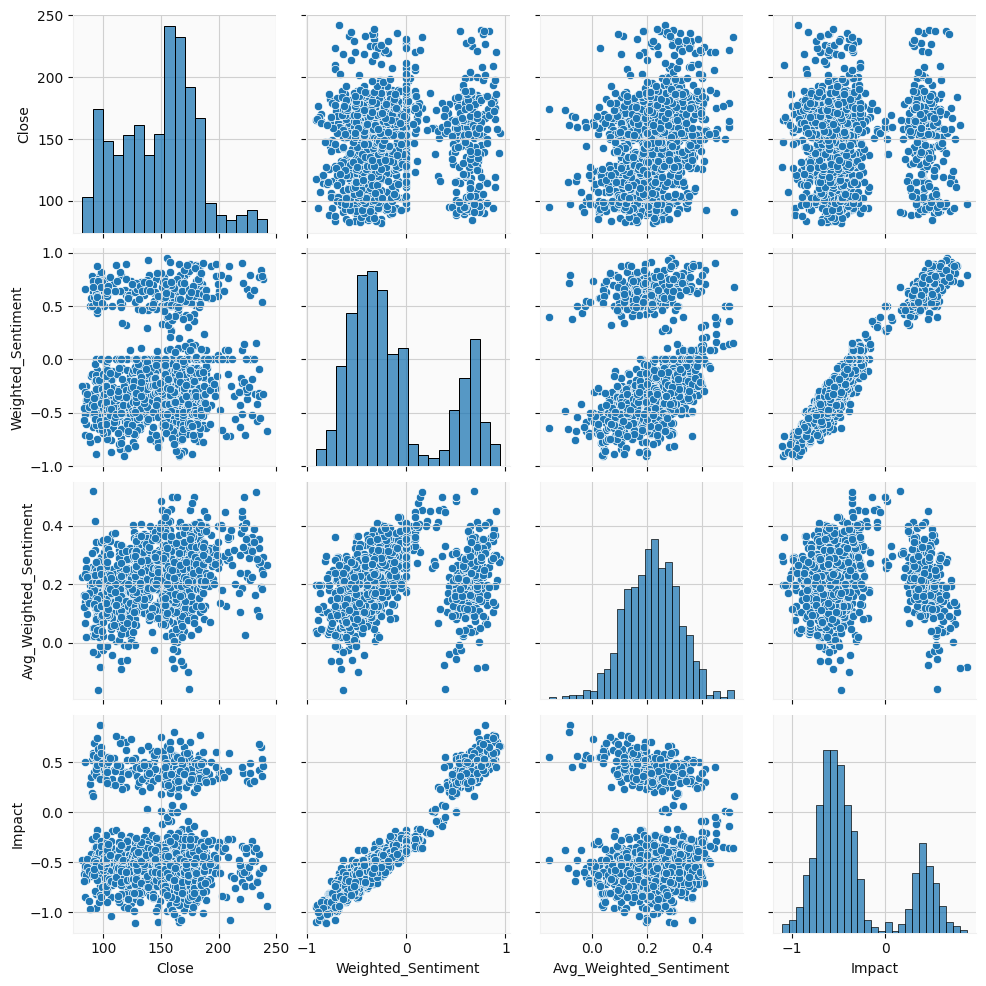

In [ ]:
# Visualize relationships between features and the target variable.
sns.pairplot(data[['Close', 'Weighted_Sentiment', 'Avg_Weighted_Sentiment', 'Impact']])
plt.show()

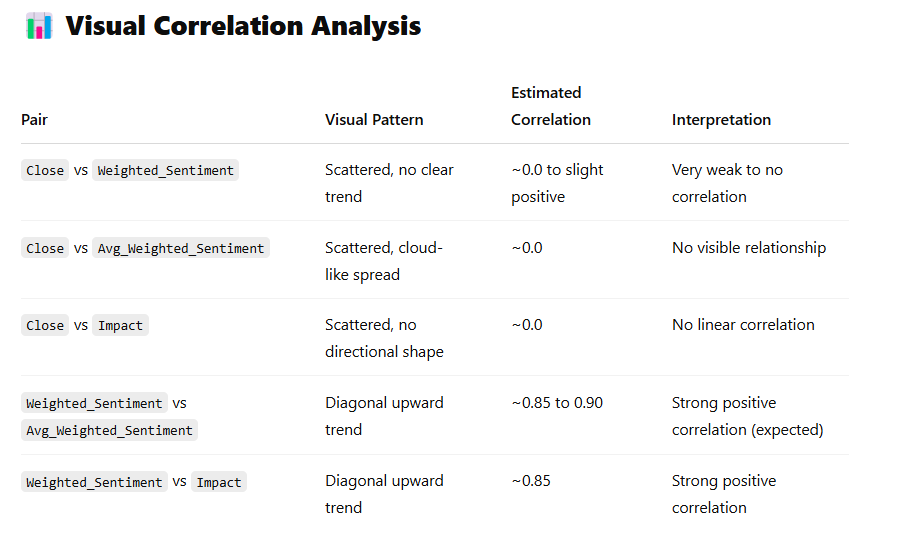

In [ ]:
X = df1.drop(['Close', 'Title',	'Text',	'URL',	'Site',	'Cleaned_Text',	'Impact_Direction'], axis=1)
y = df1[['Close']]

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
# ANN models perform better with scaled data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build ANN Model
# Create a neural network with 2 hidden layers of 64 neurons each.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # output layer for predicting house price

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compile the model
# 'adam' optimizer is good for most problems; loss function is mean squared error.
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the Model
# Fit the model with training data. Validation split helps monitor performance on unseen data.
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

In [ ]:
# Evaluate the Model
# Predict house prices on the test set.
y_pred = model.predict(X_test).flatten()
# Calculate RMSE and R^2 Score to evaluate accuracy.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, R^2 Score: {r2:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE: 3.77, R^2 Score: 0.99


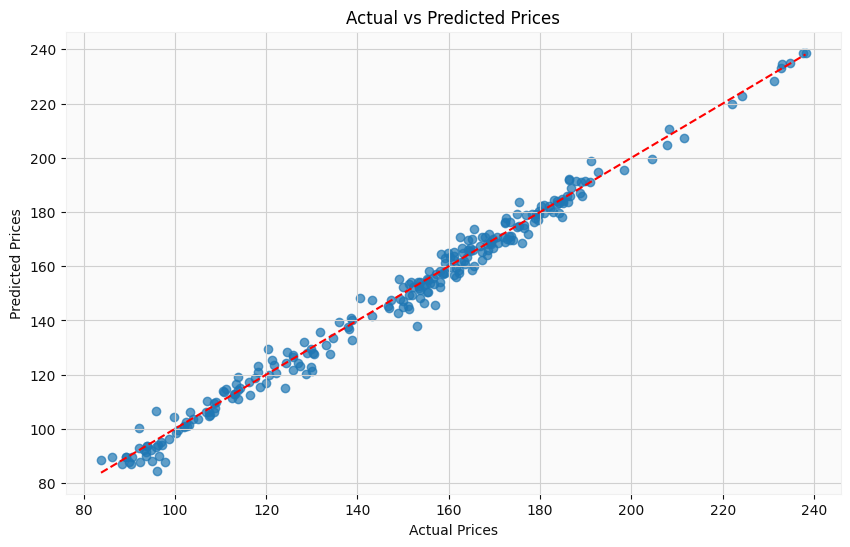

In [ ]:
# Visualization
# Compare actual vs predicted prices using a scatter plot.
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()


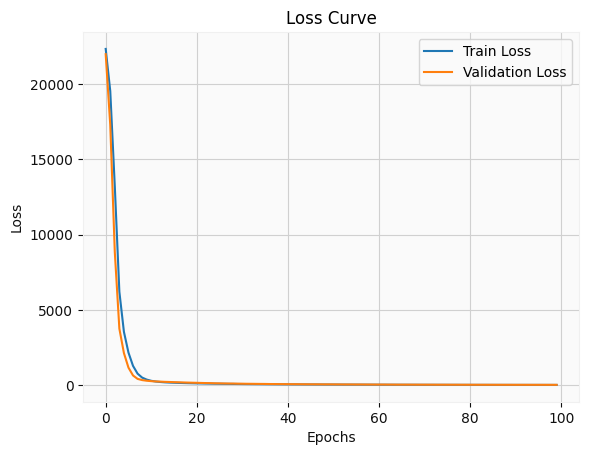

In [ ]:
# Step 9: Loss Curve
# Visualize training and validation loss over epochs.
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()